In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pastas as ps

In [2]:
gamma = ps.Gamma()
exp = ps.Exponential()
fourp = ps.FourParam()
hantush = ps.Hantush()
hantushold = ps.HantushOld()
polder = ps.Polder()
polderold = ps.PolderOld()

## Comparison of all response functions that can be written as the 4-parameter function

### Most impulse response functions can be written in the same form
Four parameter function
\begin{equation}
h(t) = At^{n-1}\exp(-t/a -ab/t)
\end{equation}
Gamma impulse response function
\begin{equation}
h(t) = At^{n-1}\exp(-t/a) \qquad (b=0)
\end{equation}
Exponential impulse response function
\begin{equation}
h(t) = A\exp(-t/a) \qquad (n=1 \quad \& \quad b=0)
\end{equation}
Hantush impulse response function
\begin{equation}
h(t) = At^{-1}\exp(-t/a - ab/t) \qquad (n=0)
\end{equation}
Polder impulse response function
\begin{equation}
h(t) = At^{-3/2}\exp(-t/a -b/t) \qquad (n=-1/2)
\end{equation}

#### Four parameter function
Four-parameter impulse function as programmed
\begin{equation}
h(t) = At^{n-1}\exp(-t/a -ab/t)
\end{equation}
The step function is normalized so that the step function approaches $A$ for large $t$. 

### Four parameter function for different values of $b$

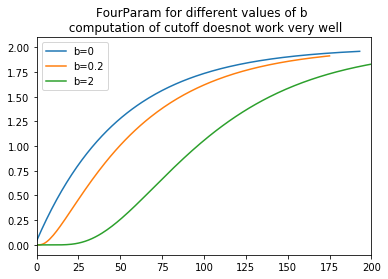

In [3]:
a = 50
for b in [0, 0.2, 2]:
    fp = fourp.step([2, 1, a, b], dt=1, cutoff=0.95) # A=2, n=1, a=50
    plt.plot(fp, label=f'b={b}')
    plt.xlim(0, 200)
plt.legend()
plt.title('FourParam for different values of b \n computation of cutoff doesnot work very well');

### Four parameter function compared to Gamma and Exponential

Gamma impulse response function as programmed
\begin{equation}
h(t) = At^{n-1}\exp(-t/a)
\end{equation}
Exponential impulse response function as programmed
\begin{equation}
h(t) = A\exp(-t/a)
\end{equation}
The step function is normalized so that the step function approaches $A$ for large $t$. 

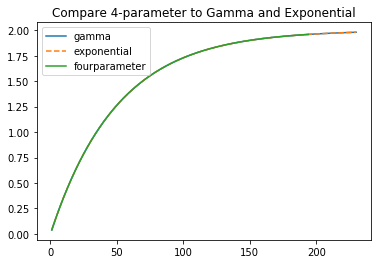

In [4]:
g = gamma.step([2, 1, 50], dt=1, cutoff=0.99) # A=2, n=1, a=50
e = exp.step([2, 50], dt=1, cutoff=0.99) # A=2, a=50
fp = fourp.step([2, 1, 50, 0], dt=1, cutoff=0.95) # A=2, n=1, a=50, b=0
plt.plot(np.arange(1, len(g) + 1), g, label='gamma')
plt.plot(np.arange(1, len(e) + 1), e, '--', label='exponential')
plt.plot(np.arange(1, len(fp) + 1), fp, label='fourparameter')
plt.legend()
plt.title('Compare 4-parameter to Gamma and Exponential');

#### Four parameter function compared to Hantush

Hantush impulse response function as programmed
\begin{equation}
h(t) = At^{-1}\exp(-t/a - ab/t)
\end{equation}

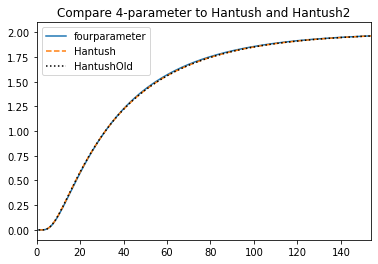

In [5]:
A = 2
a = 50
b = 0.4
# relationship between cS, rho and a, b
cS = a
rho = np.sqrt(4 * b)
fp = fourp.step([A, 1e-6, a, b], dt=1, cutoff=0.95) # A=2, n=0, a=50, b=0.4
ht = hantush.step([A, a, b], dt=1, cutoff=0.95) # A=2, a=50, b=0.4
htold = hantushold.step([2, rho, cS], dt=1, cutoff=0.95) # A=2, cS=a, rho=sqrt(4b)
plt.plot(np.arange(1, len(fp) + 1), fp, label='fourparameter')
plt.plot(np.arange(1, len(ht) + 1), ht, '--', label='Hantush')
plt.plot(np.arange(1, len(htold) + 1), htold, ':k', label='HantushOld')
plt.legend()
plt.xlim(0, len(ht))
plt.title('Compare 4-parameter to Hantush and Hantush2');

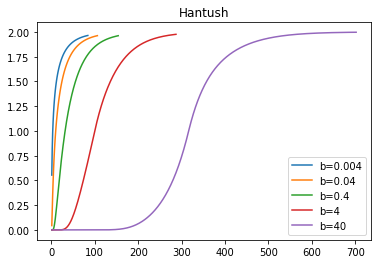

In [6]:
for b in [0.004, 0.04, 0.4, 4, 40]:
    h = hantush.step([2, 50, b], dt=1, cutoff=0.95)
    plt.plot(np.arange(1, len(h) + 1), h, label=f'b={b}')
plt.legend()
plt.title('Hantush');

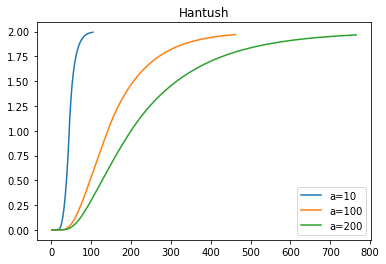

In [7]:
for a in [10, 100, 200]:
    h = hantush.step([2, a, 200 / a], dt=1, cutoff=0.95)
    plt.plot(np.arange(1, len(h) + 1), h, label=f'a={a}')
plt.legend()
plt.title('Hantush');

#### Hantush step function compared to classic Hantush function
The classic Hantush function is 
$$
h(r, t) = \frac{-Q}{4\pi T}\int_u  ^\infty  \exp\left(-y - \frac{r^2}{4  \lambda^2 y} \right) \frac{\text{d}y}{y} 
$$
where
$$
u=\frac{r^2 S}{4 T t}
$$
The step function in Pastas is scaled by
$$
\frac{1}{2 \pi T} \text{K}_0 \left(\frac{r}{\sqrt{Tc}}\right)
$$

In [3]:
from scipy.integrate import quad

def integrand_hantush(y, r, lab):
    return np.exp(-y - r ** 2 / (4 * lab ** 2 * y)) / y

def hantush_classic(t=1, r=1, Q=1, T=100, S=1e-4, c=1000):
    lab = np.sqrt(T * c)
    u = r ** 2 * S / (4 * T * t)
    F = quad(integrand_hantush, u, np.inf, args=(r, lab))[0]
    return -Q / (4 * np.pi * T) * F

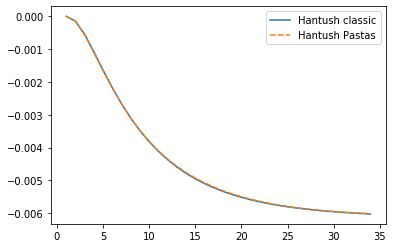

In [4]:
c = 1000 # d
S = 0.01 # -
T = 100 # m^2/d
r = 500 # m
Q = 20 # m^3/d
#
from scipy.special import k0
t = np.arange(1, 35)
h_hantush_classic = np.zeros(len(t))
for i in range(len(t)):
    h_hantush_classic[i] = hantush_classic(t[i], r=r, Q=20, T=T, S=S, c=c)
#
a = c * S
b = r ** 2 / (4 * T * c)
ht = hantush.step([1, a, b], dt=1, cutoff=0.95) * (-Q / (4 * np.pi * T))
#
plt.plot(t, h_hantush_classic, label='Hantush classic')
plt.plot(np.arange(1, len(ht) + 1), ht, '--', label='Hantush Pastas')
plt.legend();

#### Four parameter function compared to Polder

Polder impulse response function as programmed
\begin{equation}
h(t) = At^{-3/2}\exp(-t/a -b/t)
\end{equation}
The Polder function is scaled such that the step function reaches 1 everywhere, which means it is scaled by 
$\exp(-x/\lambda)=\exp\left(-2\sqrt{b/a}\right)$

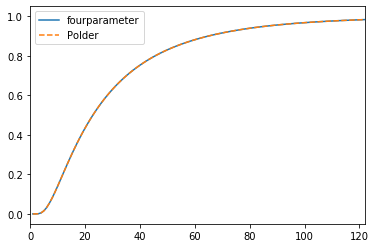

In [10]:
a = 50 
b = 0.4
A = 1
p1 = 1 / a
p0 = np.sqrt(p1 * b)
fp = fourp.step([A, -0.5, a, b], dt=1, cutoff=0.95) # A=1, n=-0.5, a=50, b=20
t = np.arange(1, 200)
pd = polder.step([A, a, b], dt=1, cutoff=0.95)
pdold = polderold.step([A, p0, p1], dt=1, cutoff=0.95)
plt.plot(np.arange(1, len(fp) + 1), fp, label='fourparameter')
plt.plot(np.arange(1, len(pd) + 1), pd, '--', label='Polder')
plt.xlim(0, len(pd))
plt.legend();

#### Polder step function compared to classic polder function
The classic polder function is 

### Compare 4-parameter func to other funcs
The five functions are compared for five different values of $n$

fp, e, h, p: 1.0000000000004374 0.9492071661351015 0.98123979275479 0.9830683612665702
fp, e, g, h, p: 0.9999999999999654 0.9492071661351015 0.9999973187391233 0.98123979275479 0.9830683612665702
fp, e, g, h, p: 0.9999999999999719 0.9492071661351015 0.9499564787512949 0.98123979275479 0.9830683612665702
fp, e, g, h, p: 0.9647133962871524 0.9492071661351015 0.9492071661351015 0.98123979275479 0.9830683612665702
fp, e, g, h, p: 0.9526242688459672 0.9492071661351015 0.9496689021401467 0.98123979275479 0.9830683612665702


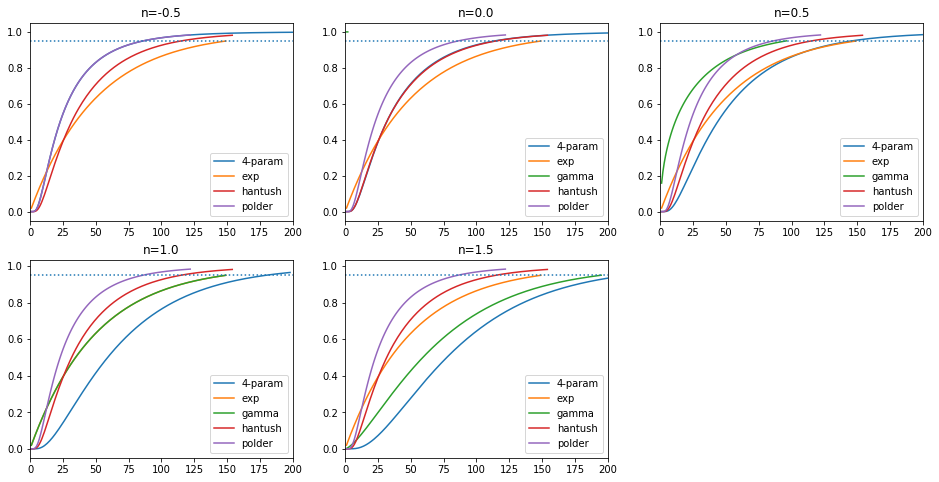

In [13]:
A = 1
a = 50
b = 0.4
plt.figure(figsize=(16, 8))
for i, n in enumerate([-0.5, 1e-6, 0.5, 1, 1.5]):
    plt.subplot(2, 3, i + 1)
    plt.title(f'n={n:0.1f}')
    fp = fourp.step([A, n, a, b], dt=1, cutoff=0.95)
    plt.plot(np.arange(1, len(fp) + 1), fp, 'C0', label='4-param')
    e = exp.step([A, a], dt=1, cutoff=0.95)
    plt.plot(np.arange(1, len(e) + 1), e, 'C1', label='exp')
    if n > 0:
        g = gamma.step([A, n, a], dt=1, cutoff=0.95)
        plt.plot(np.arange(1, len(g) + 1), g, 'C2', label='gamma')
    h = hantush.step([A, a, b], dt=1, cutoff=0.95)
    plt.plot(np.arange(1, len(h) + 1), h, 'C3', label='hantush')
    p = polder.step([A, a, b], dt=1, cutoff=0.95)
    plt.plot(np.arange(1, len(p) + 1), p, 'C4', label='polder')
    plt.xlim(0, 200)
    plt.legend()
    if n > 0:
        print('fp, e, g, h, p:', fp[-1], e[-1], g[-1], h[-1], p[-1])
    else:
        print('fp, e, h, p:', fp[-1], e[-1], h[-1], p[-1])
    plt.axhline(0.95, linestyle=':')